In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Assuming CSV with 'text' and 'label' columns)
# df = pd.read_csv("fake_real_news.csv")
fake_news = pd.read_csv("Fake-1.csv")
true_news = pd.read_csv("True-1.csv")
fake_news['label'] = 0
true_news['label'] = 1
df = pd.concat([fake_news, true_news])

<ipython-input-228-90de7a58baa2>:13: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_news = pd.read_csv("Fake-1.csv")


#EDA

##part 1

In [ ]:
#original data
df.columns

Index(['text', 'date', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 118', 'Unnamed: 119', 'Unnamed: 120', 'Unnamed: 121',
       'Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124', 'Unnamed: 125',
       'Unnamed: 126', 'label'],
      dtype='object', length=128)

In [ ]:
#missing values
d1.isnull().sum()

,0
text,0
date,5
label,0
token,0
word_count,0
tokens_no_stop,0
word_count1,0


In [ ]:

d1 = df[['text','date','label']].copy()

In [ ]:
d1.shape

(39998, 3)

In [ ]:
d1.columns

Index(['text', 'date', 'label'], dtype='object')

In [ ]:
d1.sample(5)

,text,date,label
17429,The Taliban or ISIS? Does it really matter? Ra...,"Apr 13, 2015",0
2507,WASHINGTON (Reuters) - U.S. Senate Republicans...,"July 25, 2017",1
8922,OTTAWA (Reuters) - U.S. President Barack Obama...,"June 30, 2016",1
9277,LOS ANGELES (Reuters) - Hillary Clinton fought...,"June 4, 2016",1
16048,PRESIDENT TRUMP S REMARKS TODAY IN MIAMI INCLU...,"Jun 16, 2017",0


In [ ]:
#exmples of data
d1['text'].iloc[16100]

'The Washington Post just got called out BIG TIME on a fake story they published This is a screenshot of the article:THE BIG LIE FROM WASHINGTON POST: President Trump revealed highly classified information to the Russian foreign minister and ambassador in a White House meeting last week, according to current and former U.S. officials, who said Trump s disclosures jeopardized a critical source of intelligence on the Islamic State.The information the president relayed had been provided by a U.S. partner through an intelligence-sharing arrangement considered so sensitive that details have been withheld from allies and tightly restricted even within the U.S. government, officials said.They tried to discredit President Trump in his dealings with Russia by saying President Trump revealed highly classified information to the Russians .NOT TRUE! They got caught and then called out by the Trump administration s National Security Advisor.This is awesome:National Security Advisor, H.R. McMaster m

In [ ]:
# #exmples of data
# d1['text'].iloc[6309]

##tokeinz analysis

In [ ]:
#tokeinzetion for furture extaction
import nltk
d2 = d1#.copy()

# Download tokenizer data
nltk.download('punkt_tab')

# Tokenize
d2['token'] = ''
d2['token'] = d2['text'].apply(nltk.word_tokenize)

# print(d2)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
d2.shape

(39998, 4)

In [ ]:
#playing around with tokenized words
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import bigrams
from textblob import TextBlob


all_words = [word.lower() for tokens in d2['token'] for word in tokens]
word_freq = Counter(all_words)

# Get top 5 most common words
top_words = word_freq.most_common(5)
print("Top 5 Words:", top_words)

Top 5 Words: [('the', 859658), (',', 763580), ('.', 538537), ('to', 464437), ('of', 372307)]


In [ ]:
# # Alternative with CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(lowercase=True)
# X = vectorizer.fit_transform(df['text'])
# word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))
# print("Vectorized Counts:", word_counts)

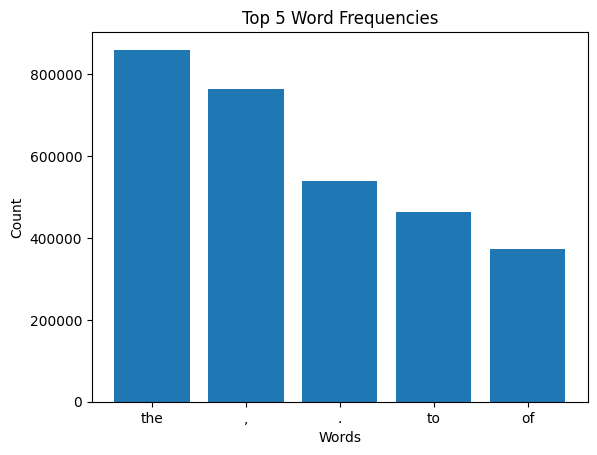

In [ ]:
# Word Frequency Bar Chart
words, counts = zip(*word_freq.most_common(5))
plt.bar(words, counts)
plt.title('Top 5 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

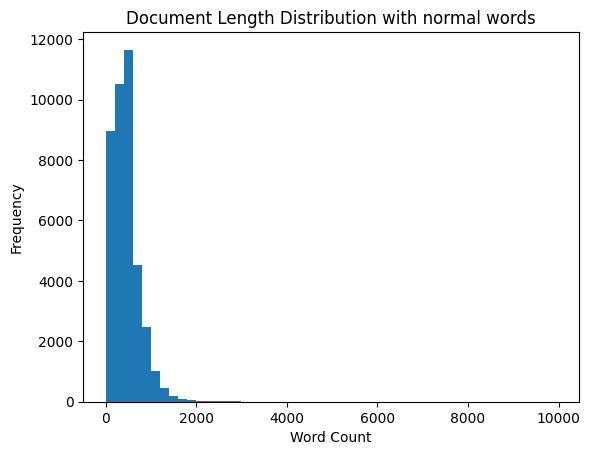

In [ ]:
# Document Length Histogram
d2['word_count'] = d2['token'].apply(len)
plt.hist(d2['word_count'], bins=50)
plt.title('Document Length Distribution with normal words')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# # Word Cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

##stop words effect

In [ ]:
#remove Stop words
import nltk
from nltk.corpus import stopwords

# Download stopwords (run once)
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

#Remove stopwords from tokens
d2['tokens_no_stop'] = d2['token'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Not_all_words = [word.lower() for tokens in d2['tokens_no_stop'] for word in tokens]
not_word_freq = Counter(Not_all_words)

# Get top 5 most common words
top_words = not_word_freq.most_common(5)
print("Top 5 Words without stop words:", top_words)

Top 5 Words without stop words: [(',', 763580), ('.', 538537), ('trump', 122048), ('said', 118416), ('’', 70768)]


In [ ]:
#
## Better use of stop word remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)  # Includes '.', ',', "'", etc.
punctuation.add('’')  # Add '’' to the set of punctuation
punctuation.add('“')  # Add '“' to the set of punctuation
punctuation.add('”')  # Add '”' to the set of punctuation
d2['tokens_no_stop'] = d2['token'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words and word not in punctuation]
)

from collections import Counter

In [ ]:
all_words = [word.lower() for tokens in d2['tokens_no_stop'] for word in tokens]
word_freq = Counter(all_words)
print("Top 5 Words without stopwords and punctuation")
print(word_freq.most_common(20))

Top 5 Words without stopwords and punctuation
[('trump', 122048), ('said', 118416), ('would', 49526), ('president', 47807), ('u.s.', 41638), ('people', 36264), ('one', 30575), ('state', 28187), ('new', 26742), ('reuters', 26737), ('also', 26615), ('donald', 26034), ('house', 25422), ('obama', 24171), ('clinton', 23945), ('republican', 23587), ('states', 23407), ('government', 22811), ('could', 21131), ('united', 21055)]


In [ ]:
words, counts = zip(*word_freq.most_common(20))

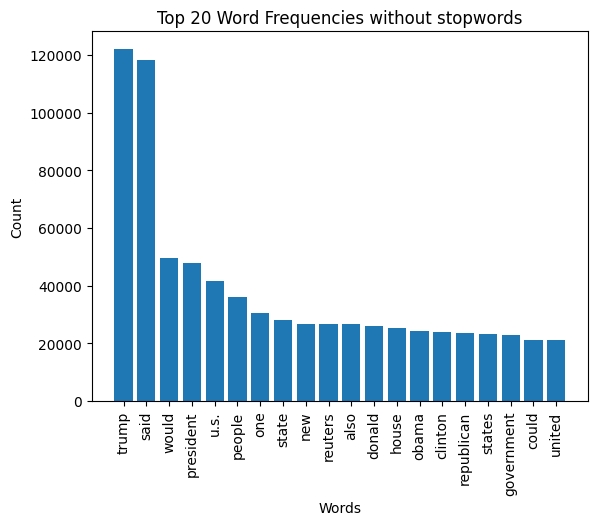

In [ ]:
# Word Frequency Bar Chart

plt.bar(words, counts)
plt.title('Top 20 Word Frequencies without stopwords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90) # Use plt.xticks with rotation parameter
plt.show()

In [ ]:
#we have lots of coutes
#lots of things about polity
#apparntly mostly about Trump Vs Clinton
#most reports are from reuters

In [ ]:
d2.shape

(39998, 6)

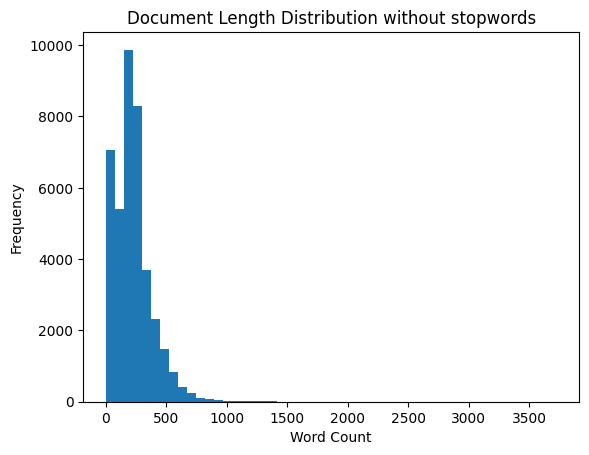

In [ ]:
# Document Length Histogram
d2['word_count1'] = d2['tokens_no_stop'].apply(len)
plt.hist(d2['word_count1'], bins=50)
plt.title('Document Length Distribution without stopwords')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

shape before outlier removed : (39998, 7)
douemnts with less than 700 no stop words: (39508, 7)


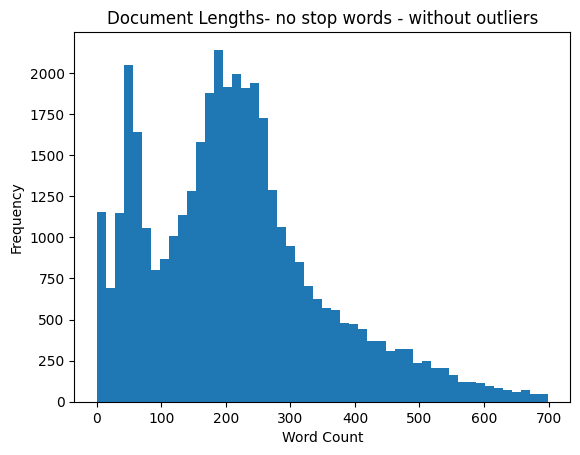

In [ ]:

d3 = d2.copy()
imit1= 700
print(f'shape before outlier removed : {d3.shape}')
d3 = d3[d3['word_count1']<imit1]
print(f'douemnts with less than {imit1} no stop words: {d3.shape}')
plt.hist(d3['word_count1'], bins=50)
plt.title('Document Lengths- no stop words - without outliers')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import textwrap

d3 = d2[d2['word_count1']>imit1]
sample_text = d3['text'].sample(1).iloc[0]  # Get one random text as a string
wrapped_text = textwrap.fill(sample_text, width=100)  # Wrap at 200 characters

# Display the wrapped text
print("Random Full Text Sample of outliers:")
print(wrapped_text)

Random Full Text Sample of outliers:
At the recommendation of both Attorney General Jeff Sessions and from Deputy Attorney General Rod J.
Rosenstein, President Trump fired FBI Director James Comey yesterday. In his letter to Comet,
President Trump stated that he believed FBI Director James Comey was  not able to effectively lead
the Bureau.  Deputy Attorney General Rod J.Rosenstein blamed Comey s handling of the Hillary Clinton
email case. Attorney General Sessions agreed with Rosenstein saying  a fresh start is needed at the
leadership of the FBI. In its 109-year history, only one F.B.I. director had been fired   until
Tuesday, when President Trump fired James B. Comey. In July 1993, President Bill Clinton fired
William S. Sessions, who had been nominated to the post by President Ronald Reagan in 1987. Mr.
Clinton said his attorney general, Janet Reno, reviewed Mr. Sessions s leadership and concluded  in
no uncertain terms that he can no longer effectively lead the bureau. Mr. Session

In [ ]:
#data is too large to keep working with
#we need to limit the data

In [ ]:
d2 = d2[d2['word_count1']<imit1]
d2.shape

(39508, 7)

In [ ]:
# # Using NLTK for bi-grams

#with normal tokens

# #Goal: Extract and count bi-grams for contextual patterns.
# #assiaction rule - Apsri
# all_bigrams = [bigram for tokens in d2['token'] for bigram in bigrams(tokens)]
# bigram_freq = Counter(all_bigrams)
# top_bigrams = bigram_freq.most_common(5)
# print("Top 5 Bi-grams:", top_bigrams)



In [ ]:
# # Using CountVectorizer for bi-grams
# #CountVectorizer: A tool that converts text into a numerical format (a "bag of words" model).
# vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), lowercase=True)
# X_ngram = vectorizer_ngram.fit_transform(d2['text'])
# ngram_counts = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))
# # print("Vectorized Bi-gram Counts:", ngram_counts)

In [ ]:
# first_element_key = list(ngram_counts.keys())[0]  # Get the first key
# first_element_value = ngram_counts[first_element_key]  # Get the value using the key

# print(f"First Element Key: {first_element_key}")
# print(f"First Element Value: {first_element_value}")


In [ ]:
# #items are not sorted .. we dont knoww the best one
# sorted_ngram_counts = dict(sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# # Alternatively, you can iterate through the dictionary to access elements:
# prints = 0;
# for key, value in sorted_ngram_counts.items():
#     print(f"Key: {key} , Count: {value}")
#     prints += 1
#     if prints > 10:
#       break

In [ ]:
#without stop words

##frequancy words check

In [ ]:
#Goal: Extract and count bi-grams for contextual patterns.
all_bigrams = [bigram for tokens in d2['tokens_no_stop'] for bigram in bigrams(tokens)]
bigram_freq = Counter(all_bigrams)
bigram_freq = bigram_freq.most_common(20)

print("Top 5 Bi-grams without stop words")

sorted_bigrams = sorted(bigram_freq, key=lambda item: item[1], reverse=True)

# prints=0
for key, value in sorted_bigrams:
    print(f"Key: {key} , Count: {value}")
    # prints += 1
    # if prints > 10:
    #   break

Top 5 Bi-grams without stop words
Key: ('Donald', 'Trump') , Count: 21486
Key: ('United', 'States') , Count: 15674
Key: ('White', 'House') , Count: 13108
Key: ('Hillary', 'Clinton') , Count: 7550
Key: ('New', 'York') , Count: 6532
Key: ('President', 'Donald') , Count: 6445
Key: ('WASHINGTON', 'Reuters') , Count: 6361
Key: ('image', 'via') , Count: 6059
Key: ('North', 'Korea') , Count: 5230
Key: ('Barack', 'Obama') , Count: 4941
Key: ('Trump', 'said') , Count: 4513
Key: ('said', 'statement') , Count: 4015
Key: ('Supreme', 'Court') , Count: 3705
Key: ('President', 'Trump') , Count: 3670
Key: ('last', 'year') , Count: 3651
Key: ('President', 'Barack') , Count: 3465
Key: ('last', 'week') , Count: 3457
Key: ('President', 'Obama') , Count: 3407
Key: ('Reuters', 'U.S.') , Count: 3393
Key: ('said', 'would') , Count: 3363


In [ ]:
d2.shape

(39508, 7)

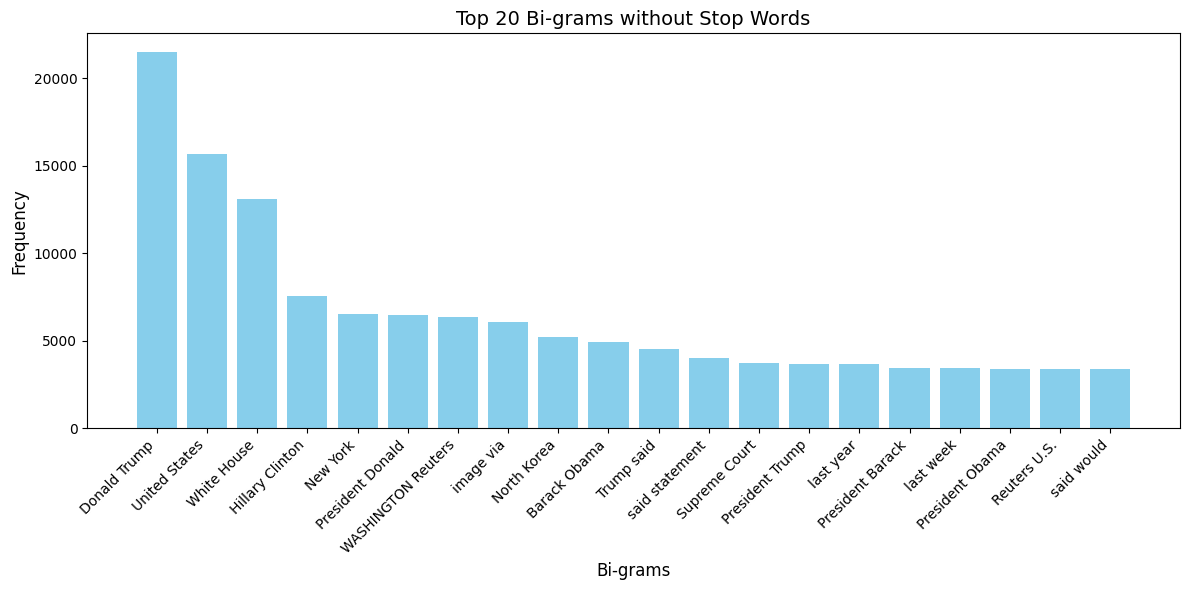

In [ ]:
# Visualization: Bar chart of top bi-grams
bigrams, counts = zip(*sorted_bigrams)  # Unpack into separate lists
bigrams = [' '.join(bigram) for bigram in bigrams]  # Convert tuples to strings

plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(bigrams, counts, color='skyblue')  # Create bar chart
plt.xlabel('Bi-grams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Bi-grams without Stop Words', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# Reconstruct text from tokens
from sklearn.feature_extraction.text import CountVectorizer

d2.loc[:, 'reconstructed_text'] = d2['tokens_no_stop'].apply(lambda x: ' '.join(x))

# Using CountVectorizer for bi-grams
#CountVectorizer: A tool that converts text into a numerical format (a "bag of words" model).
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), lowercase=True)
X_ngram = vectorizer_ngram.fit_transform(d2['reconstructed_text'])

ngram_counts = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))
# print("Vectorized Bi-gram Counts:", ngram_counts)

In [ ]:
sorted_ngram_counts = dict(sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True))
print('Top vectorizer_ngram without stop words')

# Alternatively, you can iterate through the dictionary to access elements:
prints = 0;
for key, value in sorted_ngram_counts.items():
    print(f"Key: {key} , Count: {value}")
    prints += 1
    if prints > 10:
      break

Top vectorizer_ngram without stop words
Key: donald trump , Count: 24367
Key: united states , Count: 16156
Key: white house , Count: 13533
Key: hillary clinton , Count: 7958
Key: featured image , Count: 7680
Key: new york , Count: 7672
Key: president donald , Count: 6589
Key: washington reuters , Count: 6540
Key: image via , Count: 6315
Key: twitter com , Count: 6060
Key: pic twitter , Count: 5715


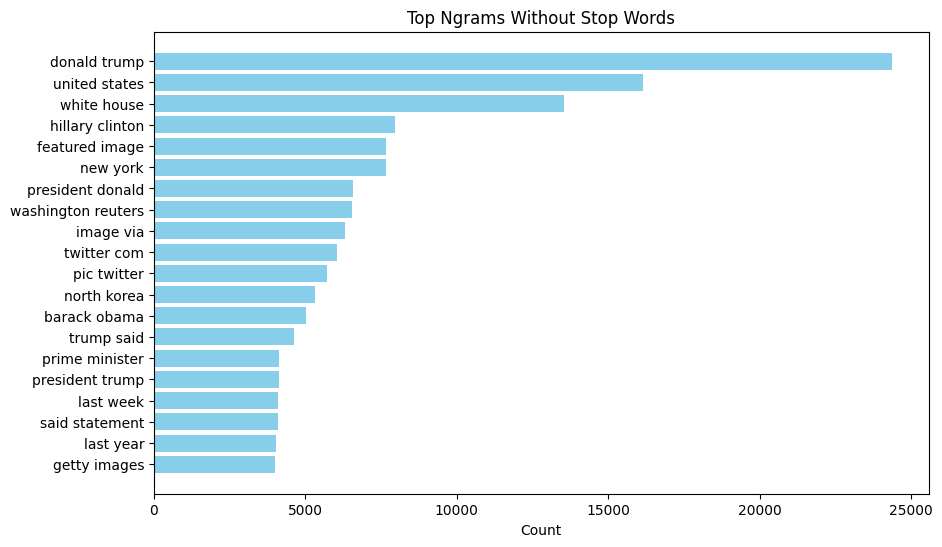

In [ ]:
# Extract the top 10 ngrams and their counts
top_ngrams = list(sorted_ngram_counts.keys())[:20]
top_counts = list(sorted_ngram_counts.values())[:20]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top Ngrams Without Stop Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the top items at the top
plt.show()

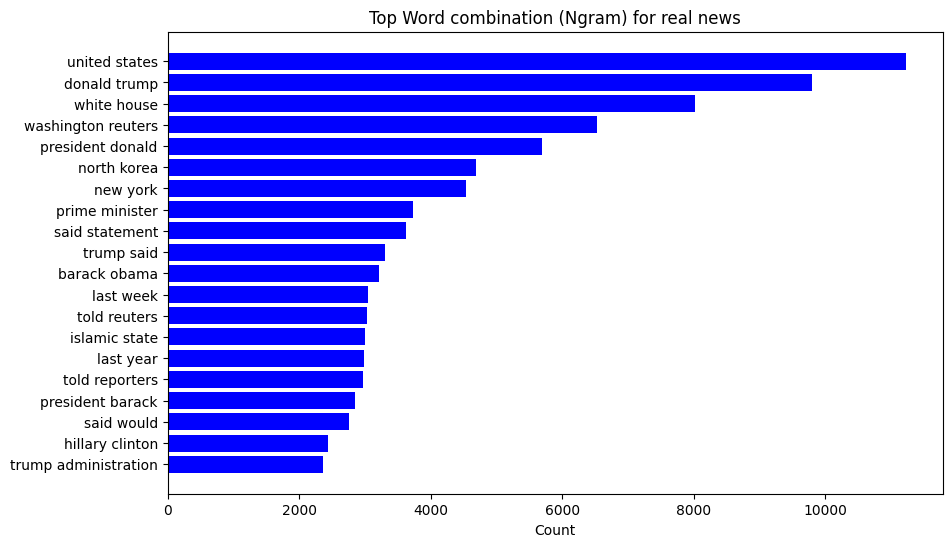

In [ ]:
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), lowercase=True)
d3 = d2[d2['label']==1]
X_ngram = vectorizer_ngram.fit_transform(d3['reconstructed_text'])

ngram_counts = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))

sorted_ngram_counts = dict(sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True))

top_ngrams = list(sorted_ngram_counts.keys())[:20]
top_counts = list(sorted_ngram_counts.values())[:20]

# Assign colors based on the value column (0 or 1)
colors = ['red' if value == 0 else 'blue' for value in d3['label']]

# Creating a bar chart with different colors based on 'value' column (0 or 1)
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_counts, color=colors)
plt.xlabel('Count')
plt.title('Top Word combination (Ngram) for real news')
plt.gca().invert_yaxis()  # Invert y-axis to show the top items at the top
plt.show()

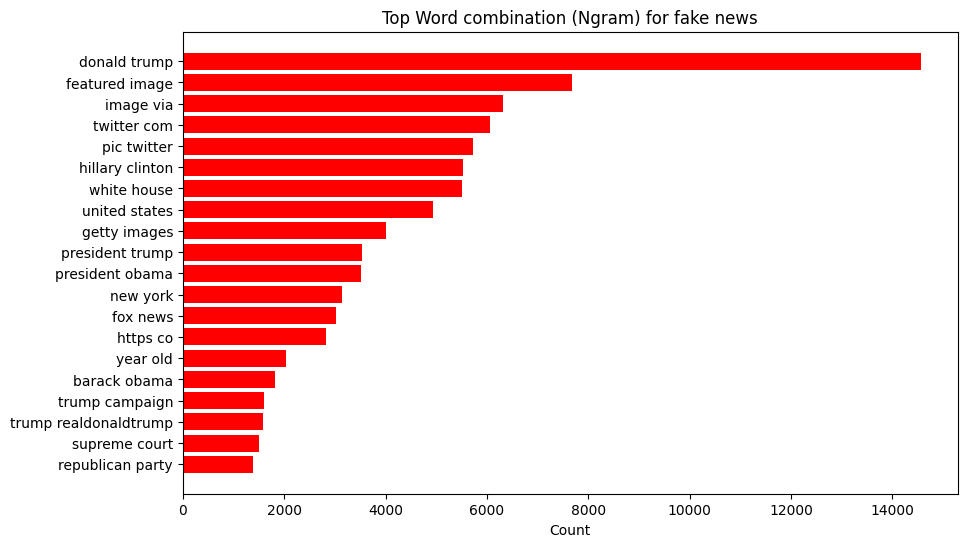

In [ ]:
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), lowercase=True)
d3 = d2[d2['label']==0]
X_ngram = vectorizer_ngram.fit_transform(d3['reconstructed_text'])

ngram_counts = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))

sorted_ngram_counts = dict(sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True))

top_ngrams = list(sorted_ngram_counts.keys())[:20]
top_counts = list(sorted_ngram_counts.values())[:20]

# Assign colors based on the value column (0 or 1)
colors = ['red' if value == 0 else 'blue' for value in d3['label']]

# Creating a bar chart with different colors based on 'value' column (0 or 1)
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_counts, color=colors)
plt.xlabel('Count')
plt.title('Top Word combination (Ngram) for fake news')
plt.gca().invert_yaxis()  # Invert y-axis to show the top items at the top
plt.show()

In [ ]:
# TF-IDF Vectorizer for bi-grams
vectorizer_ngram = TfidfVectorizer(ngram_range=(2, 2), lowercase=True)
d3 = d2[d2['label']==1]
X_ngram = vectorizer_ngram.fit_transform(d3['reconstructed_text'])

# Get TF-IDF scores (sum across documents) instead of raw counts
ngram_scores = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))

# Sort by TF-IDF score (descending)
sorted_ngram_scores = dict(sorted(ngram_scores.items(), key=lambda item: item[1], reverse=True))

# Get top 20 n-grams and their TF-IDF scores
top_ngrams = list(sorted_ngram_scores.keys())[:20]
top_scores = list(sorted_ngram_scores.values())[:20]

In [ ]:
d3.shape

(19695, 10)

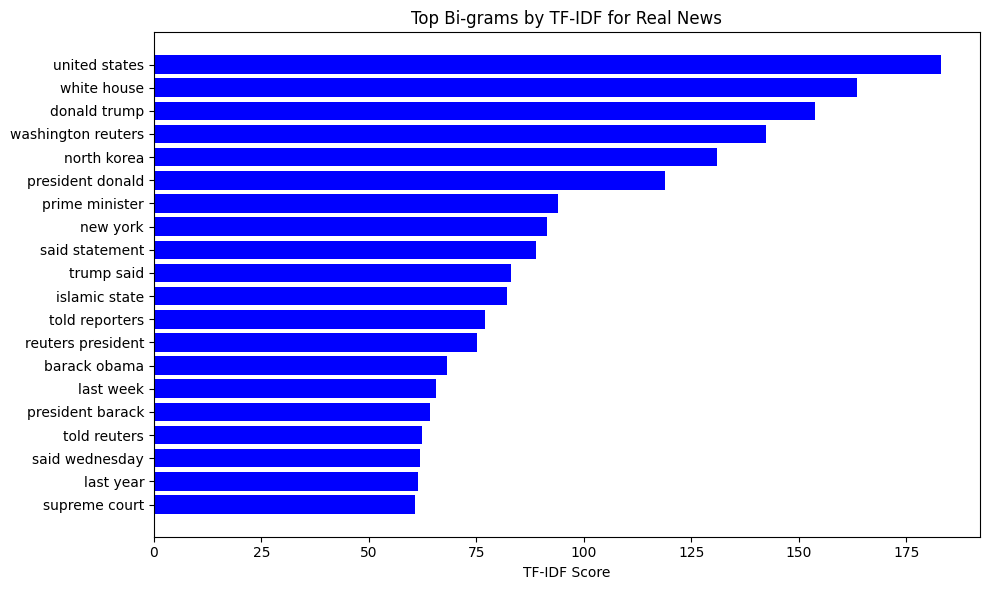

In [ ]:
# Assign colors based on the 'label' column (all 0s in d3, so all red)
colors = ['red' if value == 0 else 'blue' for value in d3['label']]

# Creating a horizontal bar chart with TF-IDF scores
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_scores, color=colors)
plt.xlabel('TF-IDF Score')
plt.title('Top Bi-grams by TF-IDF for Real News')
plt.gca().invert_yaxis()  # Invert y-axis to show top items at the top
plt.tight_layout()
plt.show()

In [ ]:
# TF-IDF Vectorizer for bi-grams
vectorizer_ngram = TfidfVectorizer(ngram_range=(2, 2), lowercase=True)
d3 = d2[d2['label']==0]
X_ngram = vectorizer_ngram.fit_transform(d3['reconstructed_text'])

# Get TF-IDF scores (sum across documents) instead of raw counts
ngram_scores = dict(zip(vectorizer_ngram.get_feature_names_out(), X_ngram.sum(axis=0).A1))

# Sort by TF-IDF score (descending)
sorted_ngram_scores = dict(sorted(ngram_scores.items(), key=lambda item: item[1], reverse=True))

# Get top 20 n-grams and their TF-IDF scores
top_ngrams = list(sorted_ngram_scores.keys())[:20]
top_scores = list(sorted_ngram_scores.values())[:20]

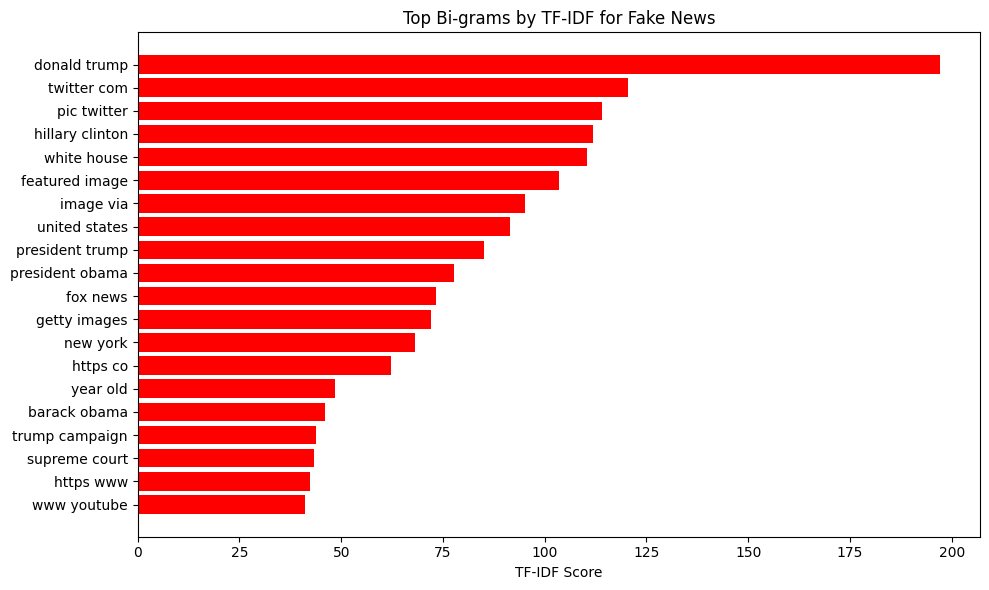

In [ ]:
# Assign colors based on the 'label' column (all 0s in d3, so all red)
colors = ['red' if value == 0 else 'blue' for value in d3['label']]

# Creating a horizontal bar chart with TF-IDF scores
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_scores, color=colors)
plt.xlabel('TF-IDF Score')
plt.title('Top Bi-grams by TF-IDF for Fake News')
plt.gca().invert_yaxis()  # Invert y-axis to show top items at the top
plt.tight_layout()
plt.show()

##Text sentement

In [ ]:
d2.shape

(39508, 8)

In [ ]:
# Using TextBlob
d2['sentiment'] = d2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment Scores:\n", d2[['text', 'sentiment']])


KeyboardInterrupt: 

In [ ]:
d2.shape

(486, 9)

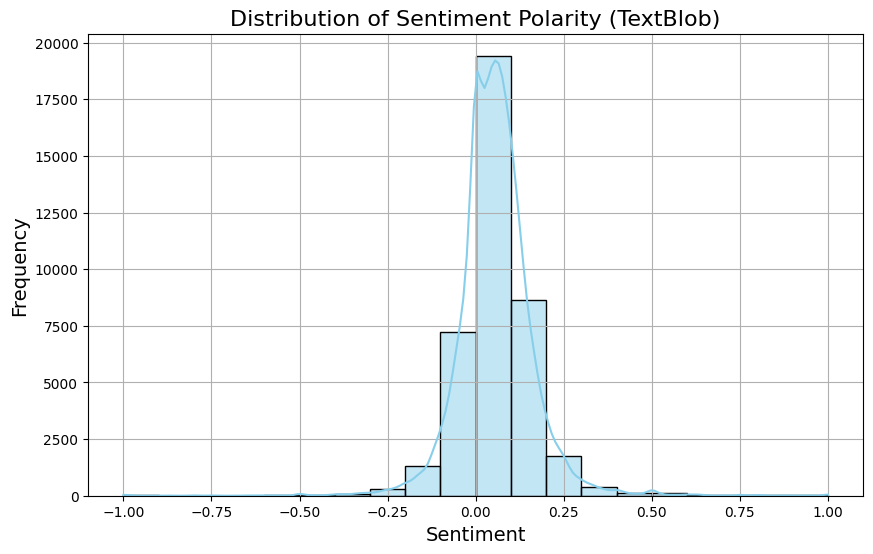

In [ ]:
import seaborn as sns
# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting the distribution of sentiment polarity
sns.histplot(d2['sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Distribution of Sentiment Polarity (TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

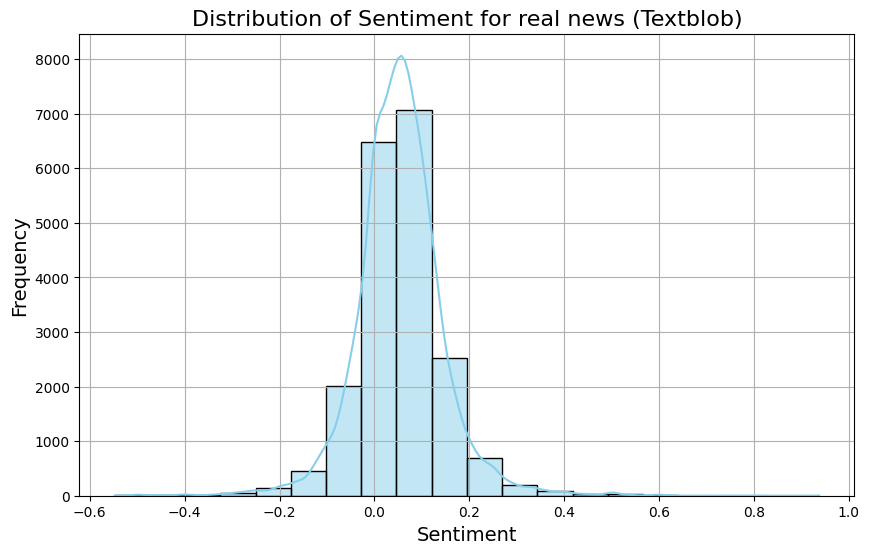

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
d3 = d2 [ d2['label']==1]
# Plotting the distribution of sentiment polarity
sns.histplot(d3['sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Distribution of Sentiment for real news (Textblob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

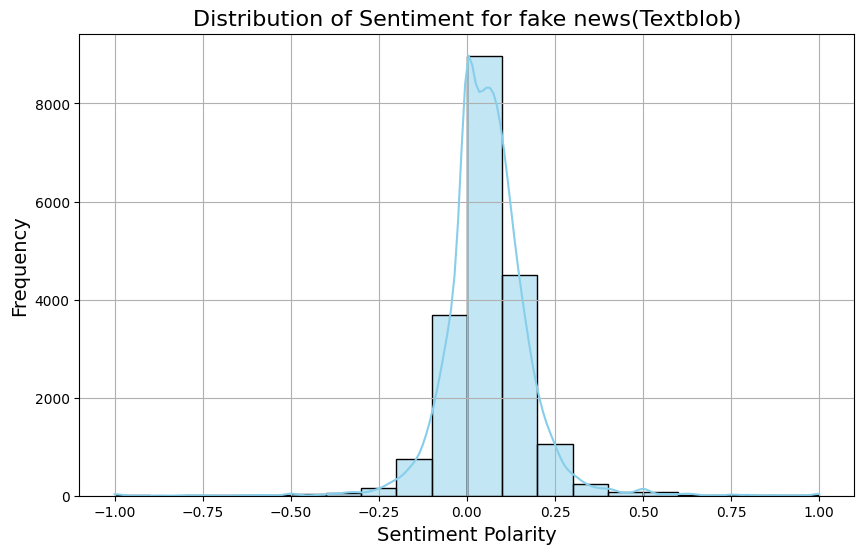

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
d3 = d2 [ d2['label']==0]
# Plotting the distribution of sentiment polarity
sns.histplot(d3['sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Distribution of Sentiment for fake news(Textblob)', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

Sentiment Scores:
                                                     text  sentiment
0      Donald Trump just couldn t wish all Americans ...   0.103191
1      House Intelligence Committee Chairman Devin Nu...  -0.014112
2      On Friday, it was revealed that former Milwauk...  -0.041640
3      On Christmas day, Donald Trump announced that ...   0.018391
4      Pope Francis used his annual Christmas Day mes...  -0.000568
...                                                  ...        ...
19994  KIEV (Reuters) - Ukraine risks reversing progr...   0.172857
19995  LONDON (Reuters) - Prime Minister Theresa May ...   0.200000
19996  ISLAMABAD (Reuters) - Pakistan s Supreme Court...   0.082224
19997  LONDON (Reuters) - British police said on Frid...   0.000000
19998  KABUL (Reuters) - U.S. President Donald Trump ...   0.104708

[39508 rows x 2 columns]


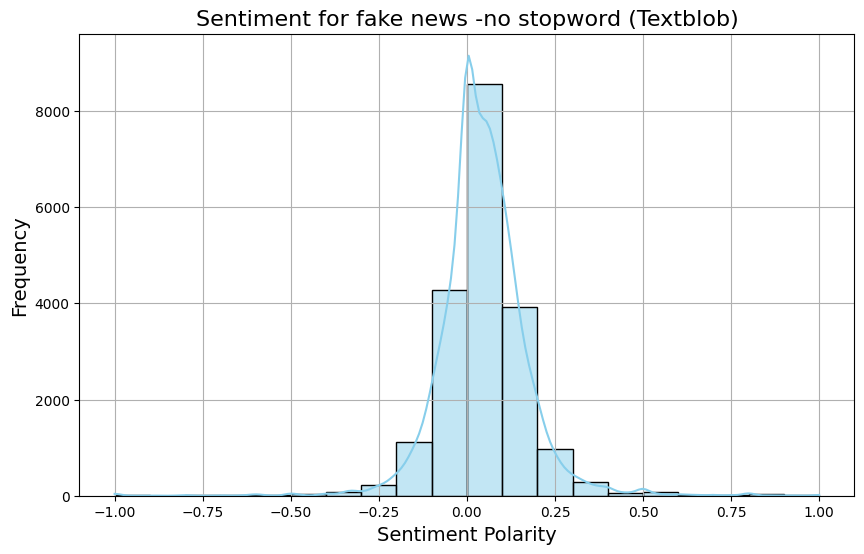

In [ ]:
#sample
# import textwrap

# # d3 = d2[d2['word_count1']>imit1]
# sample_text = d3['text'].sample(1).iloc[0]  # Get one random text as a string
# wrapped_text = textwrap.fill(sample_text, width=100)  # Wrap at 200 characters

# # Display the wrapped text
# print("Random Full Text Sample of outliers:")
# print(wrapped_text)
# Using TextBlob
d2['sentiment'] = d2['reconstructed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# print("Sentiment Scores:\n", d2[['text', 'sentiment']])
# Set up the plot
plt.figure(figsize=(10, 6))
d3 = d2 [ d2['label']==0]
# Plotting the distribution of sentiment polarity
sns.histplot(d3['sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Sentiment for fake news -no stopword (Textblob)', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Using VADER (alternative, better for nuanced tone)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
d2['vader_sentiment'] = d2['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print("VADER Sentiment Scores:\n", d2[['text', 'vader_sentiment']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER Sentiment Scores:
                                                     text  vader_sentiment
0      Donald Trump just couldn t wish all Americans ...          -0.8681
1      House Intelligence Committee Chairman Devin Nu...          -0.7141
2      On Friday, it was revealed that former Milwauk...          -0.9958
3      On Christmas day, Donald Trump announced that ...          -0.9243
4      Pope Francis used his annual Christmas Day mes...           0.5396
...                                                  ...              ...
19994  KIEV (Reuters) - Ukraine risks reversing progr...           0.9118
19995  LONDON (Reuters) - Prime Minister Theresa May ...          -0.8910
19996  ISLAMABAD (Reuters) - Pakistan s Supreme Court...           0.9842
19997  LONDON (Reuters) - British police said on Frid...          -0.9153
19998  KABUL (Reuters) - U.S. President Donald Trump ...          -0.9973

[39508 rows x 2 columns]


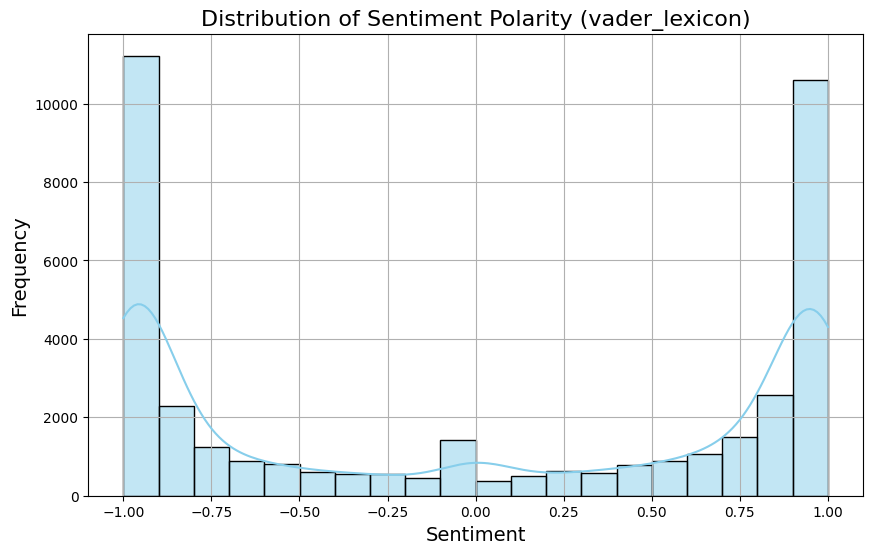

In [ ]:
import seaborn as sns
# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting the distribution of sentiment polarity
sns.histplot(d2['vader_sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Distribution of Sentiment Polarity (vader_lexicon)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

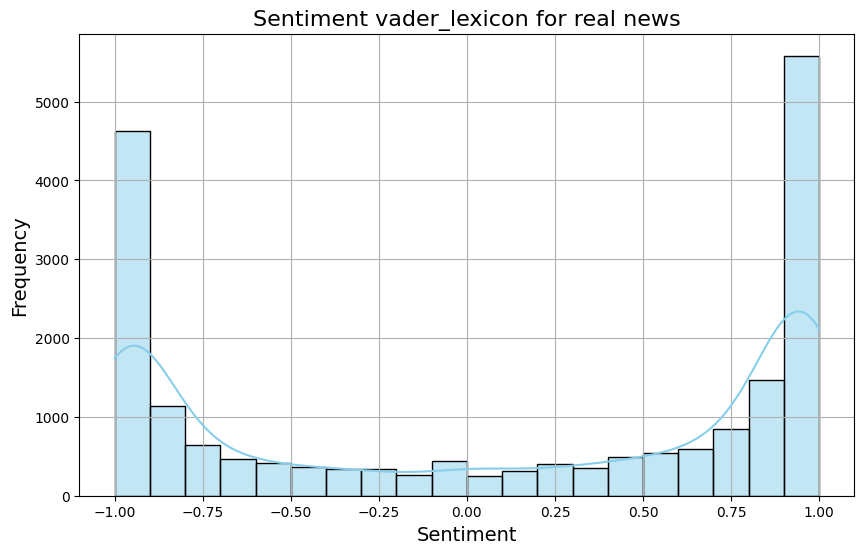

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
d3 = d2 [ d2['label']==1]
# Plotting the distribution of sentiment polarity
sns.histplot(d3['vader_sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Sentiment vader_lexicon for real news', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

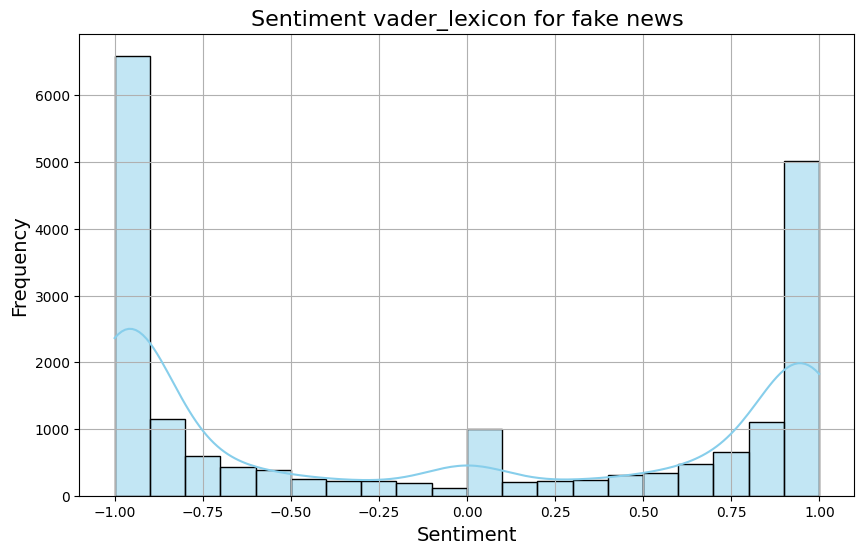

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))
d3 = d2 [ d2['label']==0]
# Plotting the distribution of sentiment polarity
sns.histplot(d3['vader_sentiment'], kde=True, color='skyblue', bins=20)

# Customizing the chart
plt.title('Sentiment vader_lexicon for fake news', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

##named enitiy

In [ ]:
d2

(39508, 10)

In [ ]:
#dataset is too large for this
#process takes too long

In [ ]:
d3 = d2.sample(1000)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
# Function to extract named entities from text
def extract_entities(text):
    doc = nlp(text)
    # Return list of (entity text, entity label) tuples
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to the 'text' column


d3['entities'] = d3['text'].apply(extract_entities)

# Flatten the list of entities and count them
all_entities = [entity for entities in d3['entities'] for entity in entities]
entity_freq = Counter(all_entities)





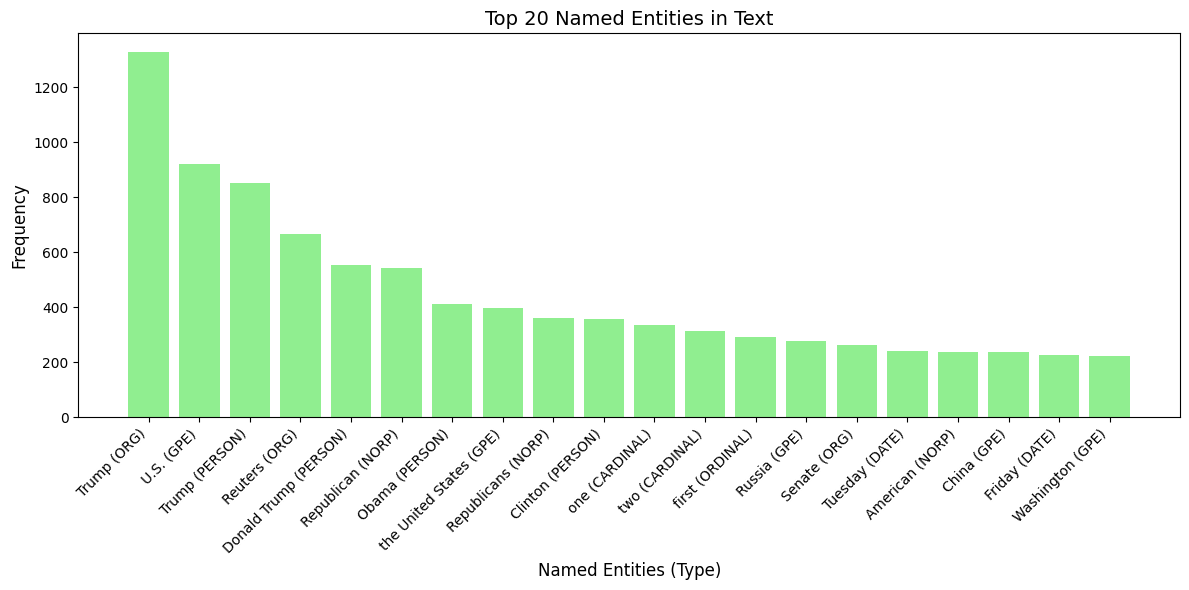

In [ ]:
# Get the top 10 most common entities
top_entities = entity_freq.most_common(20)
# Print results
# print("Top 20 Named Entities:")
# for (entity, label), count in top_entities:
#     print(f"Entity: {entity}, Type: {label}, Count: {count}")

# Visualization: Bar chart of top entities
entities, counts = zip(*[(f"{ent} ({lbl})", cnt) for (ent, lbl), cnt in top_entities])
plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='lightgreen')
plt.xlabel('Named Entities (Type)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Named Entities in Text', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

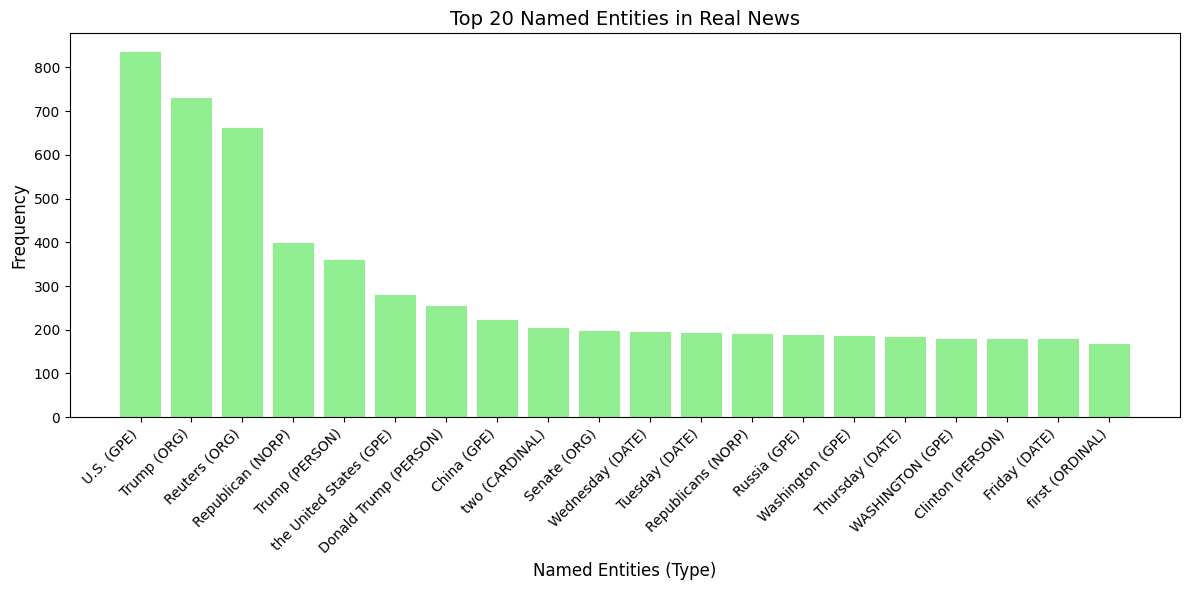

In [ ]:
# Flatten the list of entities and count them
d4 = d3[d3['label']==1]
all_entities = [entity for entities in d4['entities'] for entity in entities]
entity_freq = Counter(all_entities)
# Get the top 10 most common entities
top_entities = entity_freq.most_common(20)

# Visualization: Bar chart of top entities
entities, counts = zip(*[(f"{ent} ({lbl})", cnt) for (ent, lbl), cnt in top_entities])
plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='lightgreen')
plt.xlabel('Named Entities (Type)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Named Entities in Real News', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

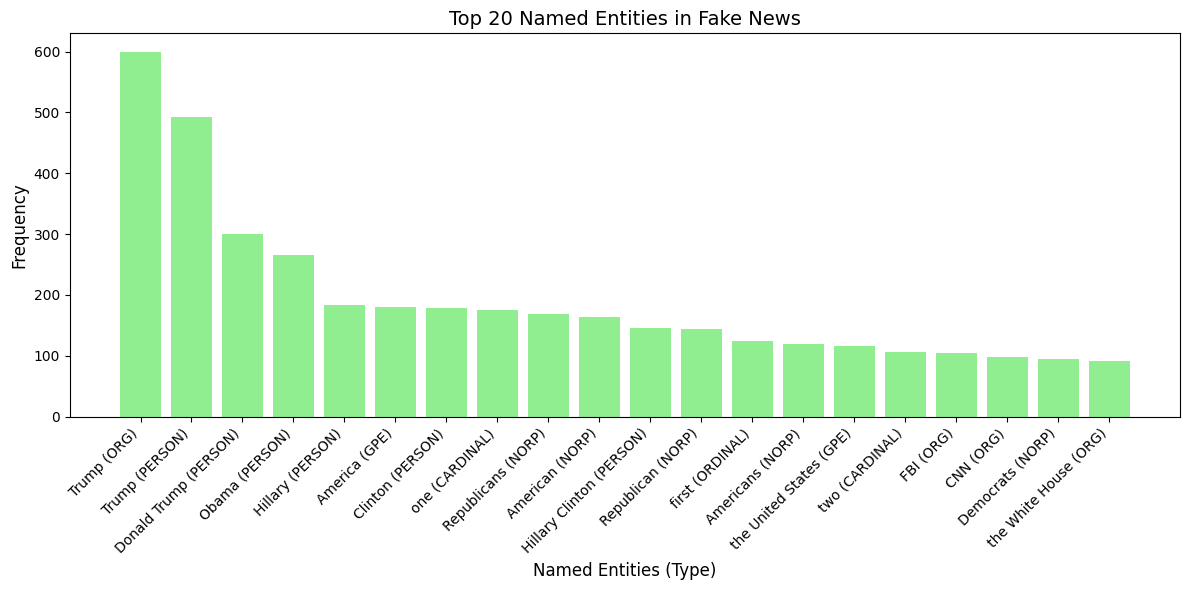

In [ ]:
# Flatten the list of entities and count them
d4 = d3[d3['label']==0]
all_entities = [entity for entities in d4['entities'] for entity in entities]
entity_freq = Counter(all_entities)
# Get the top 10 most common entities
top_entities = entity_freq.most_common(20)

# Visualization: Bar chart of top entities
entities, counts = zip(*[(f"{ent} ({lbl})", cnt) for (ent, lbl), cnt in top_entities])
plt.figure(figsize=(12, 6))
plt.bar(entities, counts, color='lightgreen')
plt.xlabel('Named Entities (Type)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Named Entities in Fake News', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:

# Convert 'date' column to datetime format (if not already)
#date time formant is not right ...
# d2['date'] = pd.to_datetime(d1['date'], format='%d-%b-%y')

# d2['date'] = pd.to_datetime(d2['date'])
# d2['date'] = pd.to_datetime(d1['date'], errors='coerce', dayfirst=False)

# Now the 'date' column should be in the correct datetime format
# print(d2)

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:

# # Extract year, month, day, weekday, etc.
# d1['year'] = d1['date'].dt.year
# d1['month'] = d1['date'].dt.month
# d1['day'] = d1['date'].dt.day
# d1['weekday'] = d1['date'].dt.weekday
# d1['quarter'] = d1['date'].dt.quarter

# # 1. Plotting the count of records per month
# plt.figure(figsize=(10, 6))
# d1.groupby('month')['date'].count().plot(kind='bar', color='skyblue')
# plt.title('Count of Records per Month')
# plt.xlabel('Month')
# plt.ylabel('Number of Records')
# plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
# plt.show()

# # 2. Plotting the count of records per day of the week
# plt.figure(figsize=(10, 6))
# d1.groupby('weekday')['date'].count().plot(kind='bar', color='lightcoral')
# plt.title('Count of Records per Weekday')
# plt.xlabel('Weekday')
# plt.ylabel('Number of Records')
# plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
# plt.show()

# # 3. Plotting time series (Value over time)
# plt.figure(figsize=(10, 6))
# plt.plot(d1['date'], d1['value'], color='green')
# plt.title('Time Series of Values')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.show()

# # 4. Plotting records per year
# plt.figure(figsize=(10, 6))
# d1.groupby('year')['date'].count().plot(kind='bar', color='orange')
# plt.title('Count of Records per Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Records')
# plt.show()

# # 5. Plotting records per quarter
# plt.figure(figsize=(10, 6))
# d1.groupby('quarter')['date'].count().plot(kind='bar', color='purple')
# plt.title('Count of Records per Quarter')
# plt.xlabel('Quarter')
# plt.ylabel('Number of Records')
# plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'], rotation=45)
# plt.show()

#modeling

In [ ]:
fake_news['label'] = 0
true_news['label'] = 1
df = pd.concat([fake_news, true_news])
# Data preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text
df["text"] = df["text"].apply(clean_text)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Text vectorization & Model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('model', MultinomialNB())
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.919625
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      4010
           1       0.89      0.96      0.92      3990

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000



In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr

# Function to predict on new input
def predict_news(news_article):
    # Clean the input text
    cleaned_text = clean_text(news_article)

    # Predict using the pipeline
    prediction = pipeline.predict([cleaned_text])[0]
    probabilities = pipeline.predict_proba([cleaned_text])[0]

    # Map prediction to label
    label = "Real" if prediction == 1 else "Fake"
    prob_fake = probabilities[0] * 100  # Probability of being fake
    prob_real = probabilities[1] * 100  # Probability of being real

    # Format the output
    output = f"Prediction: {label}\n"
    output += f"Probability of being Fake: {prob_fake:.2f}%\n"
    output += f"Probability of being Real: {prob_real:.2f}%"
    return output

# Create Gradio interface
interface = gr.Interface(
    fn=predict_news,  # Function to call
    inputs=gr.Textbox(label="Enter a News Article", placeholder="Paste the news article here..."),  # Input: Textbox for news article
    outputs=gr.Textbox(label="Prediction and Probabilities"),  # Output: Textbox for prediction and probabilities
    title="Fake News Detector",
    description="Enter a news article to determine if it's fake or real, along with the probabilities."
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://708ffc916091a7fe59.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
fake_news['text'].iloc[1202]

'Donald Trump s lies and empty threats are finally catching up to him. Just a day after the hearing of former FBI Director James Comey, Committees in Congress are announcing that they not only want to see Comey s memos of his conversations with Trump, but they also want to see the supposed White House  tapes  that Trump says exist.The Senate Judiciary Committee released a letter to Daniel Richman, a friend of Comey who had leaked Comey s memo to the press after receiving instruction from the former FBI Director to do so. This letter requests that Richman provide copies of every memo Comey gave him:The Senate Judiciary Committee has asked Comey s good friend at @ColumbiaLaw for copies of the memos Comey provided him. pic.twitter.com/kgOip24e7m  Kenneth P. Vogel (@kenvogel) June 9, 2017Trump is currently freaking out over this, and his own personal lawyer Marc Kasowitz will be filing a complaint about the leak in response.In another move that will leave Trump tweeting in anger, the House